In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers

In [3]:
runlist = ['baseline2018a', 'kraken_2026', 'colossus_2665',  
           'colossus_2664', 'colossus_2667', 'pontus_2489', 'kraken_2035',
           'mothra_2045', 'pontus_2502', 'kraken_2036', 'pontus_2002', 
           'kraken_2042', 'kraken_2044', 'mothra_2049', 'nexus_2097',
           'astro-lsst-01_2039']

objs = ['NEO', 'MBA', 'TNO']
objcolors = {'NEO': 'r', 'MBA': 'b', 'TNO': 'k'}

In [4]:
# Read in each of the 'standard' cumulative completeness results that came out of (previously calculated) metrics
# This could be done in a more limited way by reading the summary results out of the resultsDb.
comp = {}
for r in runlist:
    comp[r] = {}
    for k in objs:
        comp[r][k] = mb.createEmptyMoMetricBundle()
        # astro-lsst-01_2039_CumulativeCompleteness_NEO_3_pairs_in_15_nights_detection_loss_MOOB.npz
        filename = '%s_CumulativeCompleteness_%s_3_pairs_in_15_nights_detection_loss_MOOB.npz' % (r, k)
        comp[r][k].read(os.path.join(r, k.lower() + "s_2k", filename))

/ssd/lsst/lsstRepos/sims_maf/python/lsst/sims/maf/slicers/baseSlicer.py:402: UserWarning: Cannot use saved slicer init values; falling back to defaults
  warnings.warn('Cannot use saved slicer init values; falling back to defaults')


In [5]:
# Decide where we want to pick out "bright" and "mid" level values.
bright = {}
mid = {}
bright['NEO'] = 15
bright['MBA'] = 16
bright['TNO'] = 4
mid['NEO'] = 22
mid['MBA'] = 21
mid['TNO'] = 8.5

In [6]:
# Pull out summary/single values at these points:
for k in objs:
    brightMetric = metrics.ValueAtHMetric(Hmark = bright[k])
    midMetric = metrics.ValueAtHMetric(Hmark = mid[k])
    for r in runlist:
        comp[r][k].setSummaryMetrics([brightMetric, midMetric])
        comp[r][k].computeSummaryStats()

In [7]:
comp['baseline2018a']['MBA'].summaryValues

{'Value At H=16.0': 1.0, 'Value At H=21.0': 0.5801785119091183}

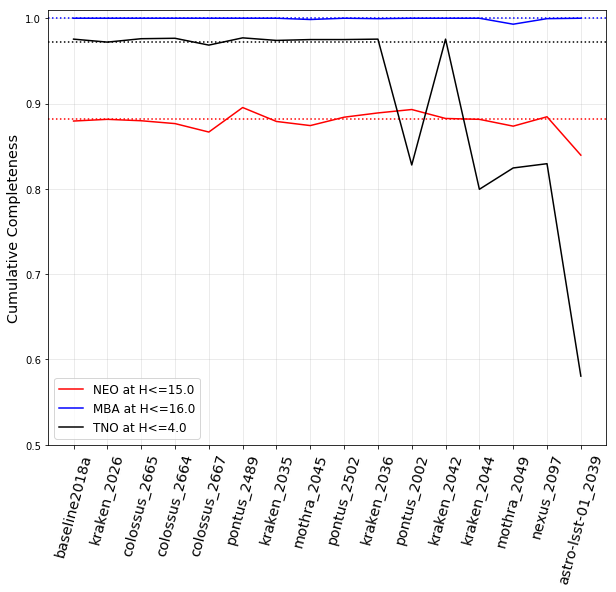

In [8]:
# And then plot these:
plt.figure(figsize=(10, 8))
rx = np.arange(len(runlist))
y = {}
for k in objs:
    summaryValueName = 'Value At H=%.1f' % bright[k]
    y = np.zeros(len(runlist), float)
    for i, r in enumerate(runlist):
        y[i] = comp[r][k].summaryValues[summaryValueName]
    plt.plot(rx, y, color=objcolors[k], label='%s at H<=%.1f' % (k, bright[k]))
    base = comp['kraken_2026'][k].summaryValues[summaryValueName]
    plt.axhline(base, color=objcolors[k], linestyle=':')
plt.legend(loc='lower left', fancybox=True, fontsize='large')
plt.xticks(rx, runlist, rotation=75, fontsize='x-large')
plt.ylabel("Cumulative Completeness", fontsize='x-large')
plt.ylim(0.5, 1.01)
plt.grid(True, alpha=0.3)

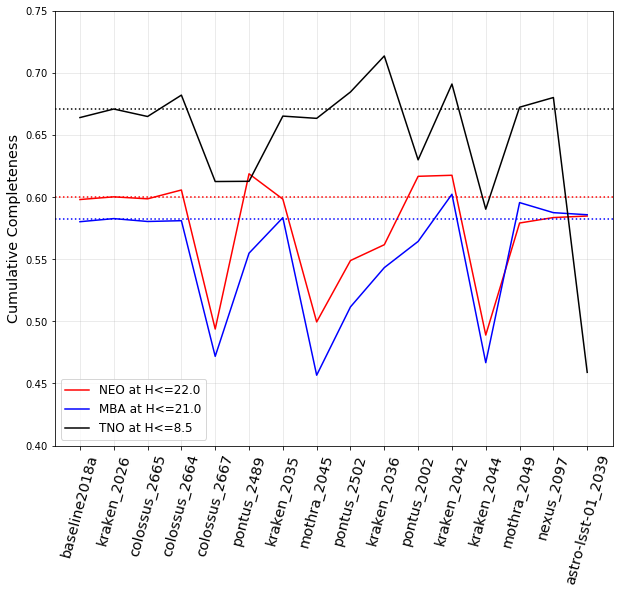

In [9]:
# And then plot these:
plt.figure(figsize=(10, 8))
rx = np.arange(len(runlist))
y = {}
for k in objs:
    summaryValueName = 'Value At H=%.1f' % mid[k]
    y = np.zeros(len(runlist), float)
    for i, r in enumerate(runlist):
        y[i] = comp[r][k].summaryValues[summaryValueName]
    plt.plot(rx, y, color=objcolors[k], label='%s at H<=%.1f' % (k, mid[k]))
    base = comp['kraken_2026'][k].summaryValues[summaryValueName]
    plt.axhline(base, color=objcolors[k], linestyle=':')
plt.legend(loc='lower left', fontsize='large', fancybox=True)
plt.xticks(rx, runlist, rotation=75, fontsize='x-large')
plt.ylabel("Cumulative Completeness", fontsize='x-large')
plt.ylim(0.4, 0.75)
plt.grid(True, alpha=0.3)

In [10]:
# Read in each of the number of observations results that came out of (previously calculated) metrics
nobs = {}
for r in runlist:
    nobs[r] = {}
    for k in objs:
        nobs[r][k] = mb.createEmptyMoMetricBundle()
        # astro-lsst-01_2039_CumulativeCompleteness_NEO_3_pairs_in_15_nights_detection_loss_MOOB.npz
        filename = '%s_NObs_%s_MOOB.npz' % (r, k)
        nobs[r][k].read(os.path.join(r, k.lower() + "s_2k", filename))

/ssd/lsst/lsstRepos/sims_maf/python/lsst/sims/maf/slicers/baseSlicer.py:402: UserWarning: Cannot use saved slicer init values; falling back to defaults
  warnings.warn('Cannot use saved slicer init values; falling back to defaults')


In [16]:
# Pull out summary/single values at these points:
for k in objs:
    brightMetric = metrics.MeanValueAtHMetric(Hmark = bright[k], reduceFunc=np.mean,
                                             metricName='Mean Value At H=%.1f' % bright[k])
    midMetric = metrics.MeanValueAtHMetric(Hmark = mid[k], reduceFunc=np.mean, 
                                           metricName='Mean Value At H=%.1f' % mid[k])
    for r in runlist:
        nobs[r][k].setSummaryMetrics([brightMetric, midMetric])
        nobs[r][k].computeSummaryStats()

In [21]:
nobs['baseline2018a']['NEO'].summaryValues

{'Median Value At H=15.0': 316.0,
 'Median Value At H=22.0': 15.0,
 'Mean Value At H=15.0': 355.8636604774536,
 'Mean Value At H=22.0': 42.34118541033435}

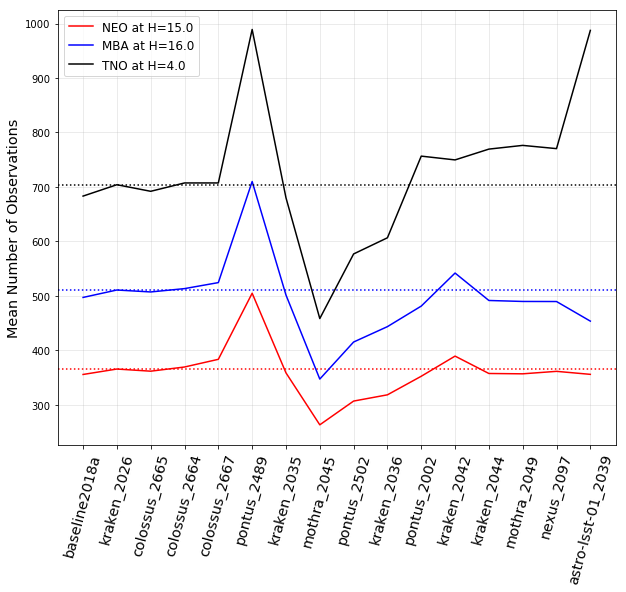

In [26]:
# And then plot these:
plt.figure(figsize=(10, 8))
rx = np.arange(len(runlist))
y = {}
for k in objs:
    summaryValueName = 'Mean Value At H=%.1f' % bright[k]
    y = np.zeros(len(runlist), float)
    for i, r in enumerate(runlist):
        y[i] = nobs[r][k].summaryValues[summaryValueName]
    plt.plot(rx, y, color=objcolors[k], label='%s at H=%.1f' % (k, bright[k]))
    base = nobs['kraken_2026'][k].summaryValues[summaryValueName]
    plt.axhline(base, color=objcolors[k], linestyle=':')
plt.legend(loc='upper left', fancybox=True, fontsize='large')
plt.xticks(rx, runlist, rotation=75, fontsize='x-large')
plt.ylabel("Mean Number of Observations", fontsize='x-large')
#plt.ylim(0.5, 1.01)
plt.grid(True, alpha=0.3)

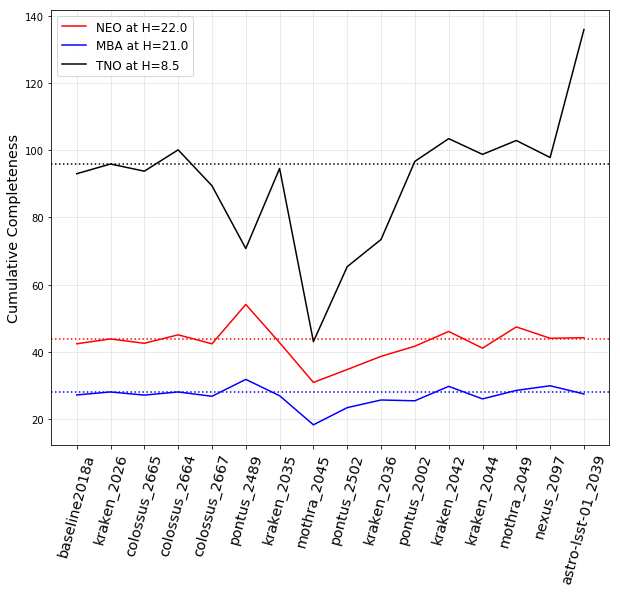

In [25]:
# And then plot these:
plt.figure(figsize=(10, 8))
rx = np.arange(len(runlist))
y = {}
for k in objs:
    summaryValueName = 'Mean Value At H=%.1f' % mid[k]
    y = np.zeros(len(runlist), float)
    for i, r in enumerate(runlist):
        y[i] = nobs[r][k].summaryValues[summaryValueName]
    plt.plot(rx, y, color=objcolors[k], label='%s at H=%.1f' % (k, mid[k]))
    base = nobs['kraken_2026'][k].summaryValues[summaryValueName]
    plt.axhline(base, color=objcolors[k], linestyle=':')
plt.legend(loc='upper left', fontsize='large', fancybox=True)
plt.xticks(rx, runlist, rotation=75, fontsize='x-large')
plt.ylabel("Cumulative Completeness", fontsize='x-large')
plt.grid(True, alpha=0.3)